In [19]:
!pip install shioaji
import numpy as np
import pandas as pd
import requests
import shioaji as sj
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from google.colab import userdata

# 建立API物件，simulation=True是代表測試帳號
api = sj.Shioaji(simulation=True)

#==== for Colab
shioaji_secret=userdata.get('SHIOAJI_SECRETKEY')
shioaji_apikey=userdata.get('SHIOAJI_APIKEY')

# 登入你的key
accounts = api.login(shioaji_apikey, shioaji_secret)

Response Code: 0 | Event Code: 0 | Info: host '210.59.255.161:80', IP 210.59.255.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


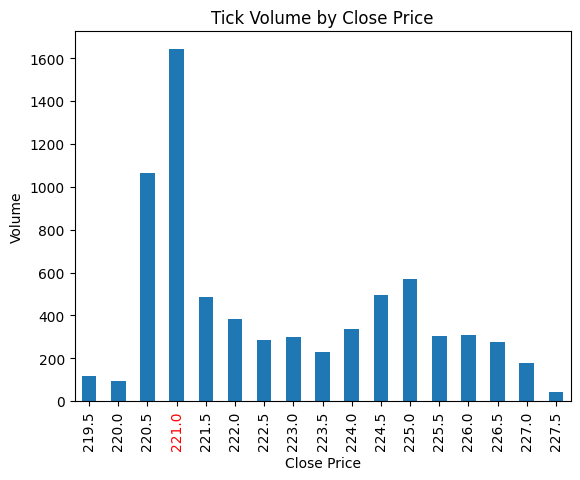

In [31]:
# 取得個股某日tick資料
def getTicksVolume(stockCode,dateTime):
  ticks = api.ticks(
      contract=api.Contracts.Stocks[stockCode],
      date=dateTime
  )
  df = pd.DataFrame({**ticks})
  df.ts = pd.to_datetime(df.ts)
  last_close = df.tail(1)['close'].values[0]
  volume_by_close = df.groupby('close')['volume'].sum()
  volume_by_close.plot(kind='bar', title='Tick Volume by Close Price')
  plt.xlabel('Close Price')
  plt.ylabel('Volume')

  # 獲取當前的x軸標籤
  ax = plt.gca()
  xticks = ax.get_xticklabels()

  # 遍歷標籤並將指定的標籤變成紅色
  for label in xticks:
    if label.get_text() == str(last_close):  # 假設要把標籤3變成
      label.set_color('red')
  plt.show()


tick_volume = getTicksVolume("9958","2024-10-16")
tick_volume




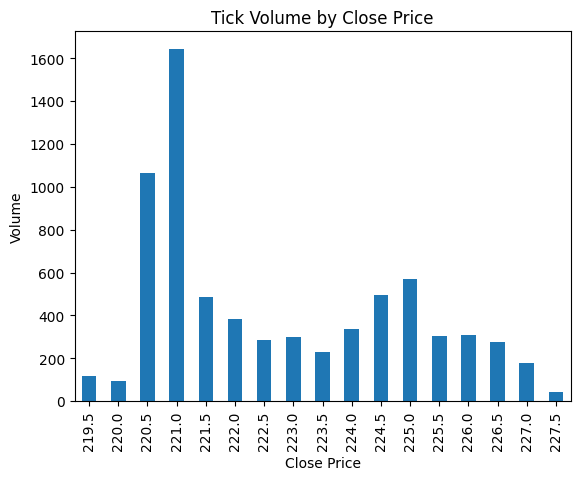

In [15]:

tick_volume_df.plot(kind='bar', title='Tick Volume by Close Price')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()